In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Input
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [7]:
df = pd.read_csv('../Dataset/transport.csv')

In [8]:
df

,Category,Carbon Emission (kg CO2),Distance (km)
0,Public,47.25,192.19
1,Public,0.82,8.48
2,Public,0.37,83.23
3,Private,11.57,67.74
4,Public,54.39,221.20
...,...,...,...
808,Public,4.62,166.02
809,Public,24.17,163.49
810,Public,3.92,137.15
811,Public,7.71,97.21


In [9]:
category_mapping = {category: idx for idx, category in enumerate(df["Category"].unique())}
df["Category_encoded"] = df["Category"].map(category_mapping)

In [10]:
X = df[["Category_encoded", "Distance (km)"]].values
y = df["Carbon Emission (kg CO2)"].values.reshape(-1, 1)

In [11]:
scaler_y = MinMaxScaler()
y_normalized = scaler_y.fit_transform(y)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y_normalized, test_size=0.2, random_state=42)


In [13]:
def create_emission_model(input_dim):
    inputs = tf.keras.layers.Input(shape=(input_dim,), name="inputs")


    category_input = tf.keras.layers.Embedding(input_dim=len(category_mapping), output_dim=5, input_length=1)(inputs[:, 0])
    category_flatten = tf.keras.layers.Flatten()(category_input)

    
    distance_input = tf.keras.layers.Lambda(lambda x: x[:, 1:])(inputs)
    concat = tf.keras.layers.Concatenate()([category_flatten, distance_input])

   
    dense_1 = tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01))(concat)
    dropout_1 = tf.keras.layers.Dropout(0.2)(dense_1)
    dense_2 = tf.keras.layers.Dense(32, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01))(dropout_1)

    
    carbon_output = tf.keras.layers.Dense(1, activation="linear", name="carbon_output")(dense_2)

   
    optimizer = tf.keras.optimizers.Adam()
    model = tf.keras.Model(inputs=inputs, outputs=carbon_output)
    model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])
    return model

In [14]:
input_dim = X.shape[1]
model = create_emission_model(input_dim)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [15]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=16,
    verbose=1
)


Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 75.5317 - mae: 6.2174 - val_loss: 11.1745 - val_mae: 2.9138
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.0761 - mae: 3.2671 - val_loss: 2.2277 - val_mae: 1.2167
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 14.6479 - mae: 2.5919 - val_loss: 16.0302 - val_mae: 3.5249
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10.9097 - mae: 2.2041 - val_loss: 10.1746 - val_mae: 2.7931
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.7803 - mae: 1.9717 - val_loss: 5.5291 - val_mae: 2.0395
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.5602 - mae: 1.6020 - val_loss: 1.3107 - val_mae: 0.9096
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.9174 - mae: 1.5526 - val_loss: 1.3386 - val_mae: 0.9273
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.3076 - mae: 1.4883 - val_loss: 1.4652 - val_mae: 0.9809
Epoch 9/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - los

In [16]:

loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss}")
print(f"Test MAE: {mae}")

Test Loss: 0.2325398325920105
Test MAE: 0.2106788009405136


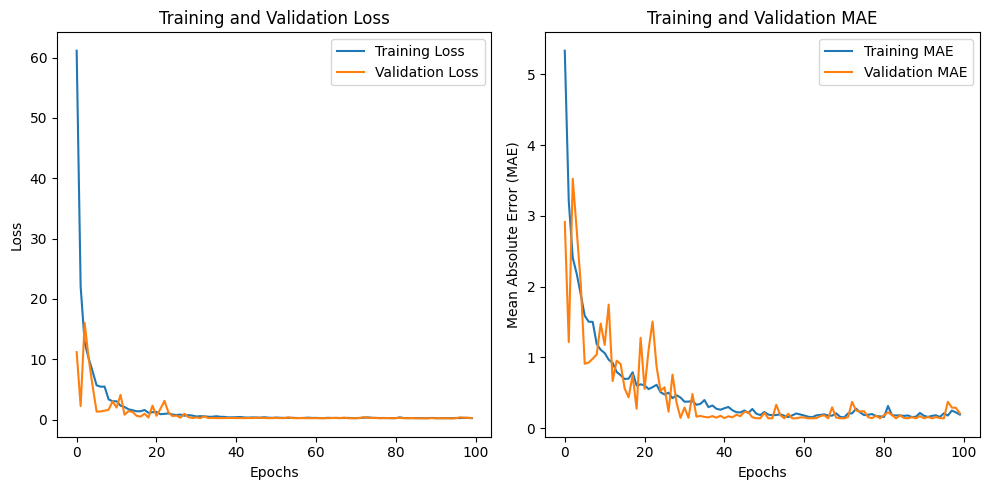

In [17]:
history_data = history.history

# Visualisasi Loss
plt.figure(figsize=(10, 5))

# training loss & validation loss
plt.subplot(1, 2, 1)
plt.plot(history_data['loss'], label='Training Loss')
plt.plot(history_data['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# MAE
plt.subplot(1, 2, 2)
plt.plot(history_data['mae'], label='Training MAE')
plt.plot(history_data['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()

plt.tight_layout()
plt.show()

In [18]:
print(category_mapping)

{'Public': 0, 'Private': 1, 'Bike': 2, 'Walk': 3, 'Motorcycle': 4}


In [ ]:
input_category = "Public"
input_distance = 50

if input_category in category_mapping:
    encoded_category = category_mapping[input_category]
else:
    raise ValueError(f"Kategori '{input_category}' tidak ditemukan dalam category_mapping.")

input_data = np.array([[encoded_category, input_distance]])
predicted_normalized = model.predict(input_data)

predicted_emission = scaler_y.inverse_transform(predicted_normalized)

print(f"Kategori: {input_category}, Jarak: {input_distance} km")
print(f"Prediksi Emisi Karbon: {predicted_emission[0][0]:.2f} kg CO2")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Kategori: Public, Jarak: 50 km
Prediksi Emisi Karbon: 8.09 kg CO2


In [21]:
model.save('transport_model.h5')